# About

Test to see if we can do a better pipeline. Should handle imputing missing or bad data, extracting attributes, encode categorical or ordinal features, etc



In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split

%reload_ext autoreload
%autoreload 2
import src.features.build_features as bf

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# loads data
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")

using shuffle_split_data

1. start with train_pd or test_pd
2. shuffle
3. split into data (and labels)

using prep_data

4. extract basic features from data, with SFCCTransformer
5. split data into numeric, categorical
6. from numerics, scrub bad values, such as X and Y
7. minmax scale numerics
8. onehot encode categorical
9. feature union everything

In [3]:
print(train_pd.columns)
print(train_pd.shape)
print(test_pd.columns)
print(test_pd.shape)

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')
(878049, 9)
Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')
(884262, 7)


In [4]:
# shuffles the train and test dataframes
# note, we don't need a dev set since we will be using cross validation
train_data, train_labels, test_data, test_ids = bf.prep_data(train_pd, test_pd)

print("================")
print(type(train_data))
print(train_data.columns)
print(train_data.shape)
print(type(train_labels))
print(train_labels.shape)

print("================")
print(type(test_data))
print(test_data.columns)
print(test_data.shape)
print(type(test_ids))
print(test_ids.shape)

<class 'pandas.core.frame.DataFrame'>
Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')
(878049, 6)
<class 'pandas.core.series.Series'>
(878049,)
<class 'pandas.core.frame.DataFrame'>
Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')
(884262, 6)
<class 'pandas.core.series.Series'>
(884262,)


# tests the SFCCTransformer

## X and Y

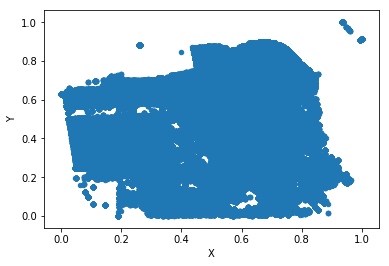

In [5]:
# tests the default strategy for X and Y
sfcc = bf.SFCCTransformer()
pipe = Pipeline([
    ("transformer", sfcc)
])
temp = pipe.transform(train_data[["X", "Y"]])

temp.plot.scatter(x = "X", y = "Y")

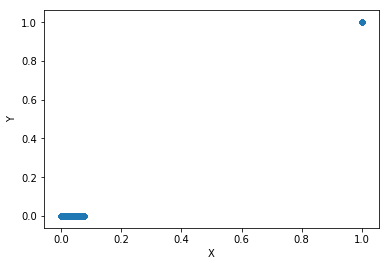

In [6]:
# tests the identity strategory for X and Y
sfcc = bf.SFCCTransformer(geo_strategy = "identity")
pipe = Pipeline([
    ("transformer", sfcc)
])
temp = pipe.transform(train_data[["X", "Y"]])

temp.plot.scatter(x = "X", y = "Y")

# PdDistrict

In [7]:
sfcc = bf.SFCCTransformer(pddistrict_drop = False, pddistrict_onehot = True)
pipe = Pipeline([
    ("transformer", sfcc)
])

temp = pipe.transform(train_data[["PdDistrict"]])

print(temp.columns)
print(temp.head())

Index(['PdDistrict', 'pdd_BAYVIEW', 'pdd_CENTRAL', 'pdd_INGLESIDE',
       'pdd_MISSION', 'pdd_NORTHERN', 'pdd_PARK', 'pdd_RICHMOND',
       'pdd_SOUTHERN', 'pdd_TARAVAL', 'pdd_TENDERLOIN'],
      dtype='object')
  PdDistrict  pdd_BAYVIEW  pdd_CENTRAL  pdd_INGLESIDE  pdd_MISSION  \
0    BAYVIEW            1            0              0            0   
1    MISSION            0            0              0            1   
2  INGLESIDE            0            0              1            0   
3    MISSION            0            0              0            1   
4    MISSION            0            0              0            1   

   pdd_NORTHERN  pdd_PARK  pdd_RICHMOND  pdd_SOUTHERN  pdd_TARAVAL  \
0             0         0             0             0            0   
1             0         0             0             0            0   
2             0         0             0             0            0   
3             0         0             0             0            0   
4             0 

## DayOfWeek

In [8]:
sfcc = bf.SFCCTransformer(dayofweek_drop = False, dayofweek_onehot = True)
pipe = Pipeline([
    ("transformer", sfcc)
])

temp = pipe.transform(train_data[["DayOfWeek"]])

print(temp.columns)
print(temp.head())

Index(['DayOfWeek', 'dow_Friday', 'dow_Monday', 'dow_Saturday', 'dow_Sunday',
       'dow_Thursday', 'dow_Tuesday', 'dow_Wednesday'],
      dtype='object')
   DayOfWeek  dow_Friday  dow_Monday  dow_Saturday  dow_Sunday  dow_Thursday  \
0     Friday           1           0             0           0             0   
1  Wednesday           0           0             0           0             0   
2    Tuesday           0           0             0           0             0   
3     Friday           1           0             0           0             0   
4     Monday           0           1             0           0             0   

   dow_Tuesday  dow_Wednesday  
0            0              0  
1            0              1  
2            1              0  
3            0              0  
4            0              0  


## Dates

In [9]:
sfcc = bf.SFCCTransformer(
    dates_drop= False
    , dates_deltas = True
    , dates_binary = False
    , dates_ordinal = False
    , dates_onehot = False
    , dates_cyclical = False
)
pipe = Pipeline([
    ("transformer", sfcc)
])

temp = pipe.transform(train_data[["Dates"]])

print(temp.columns)
print(temp.head())

Index(['Dates', 'hour_delta', 'day_delta', 'week_delta', 'month_delta',
       'year_delta'],
      dtype='object')
                 Dates  hour_delta  day_delta  week_delta  month_delta  \
0  2008-05-02 17:30:00    0.430886     0.4308       0.430        0.426   
1  2009-09-30 18:30:00    0.545283     0.5452       0.545        0.541   
2  2007-02-20 16:33:00    0.334001     0.3339       0.334        0.331   
3  2008-11-14 18:00:00    0.474336     0.4743       0.474        0.473   
4  2003-09-29 18:17:00    0.059134     0.0590       0.059        0.054   

   year_delta  
0       0.417  
1       0.500  
2       0.333  
3       0.417  
4       0.000  


In [10]:
sfcc = bf.SFCCTransformer(
    dates_drop= False
    , dates_deltas = False
    , dates_binary = True
    , dates_ordinal = False
    , dates_onehot = False
    , dates_cyclical = False
)
pipe = Pipeline([
    ("transformer", sfcc)
])

temp = pipe.transform(train_data[["Dates"]])

print(temp.columns)
print(temp.head(30))

Index(['Dates', 'is_weekend', 'is_holiday', 'is_latenight'], dtype='object')
                  Dates  is_weekend  is_holiday  is_latenight
0   2008-05-02 17:30:00           0           0             0
1   2009-09-30 18:30:00           0           0             0
2   2007-02-20 16:33:00           0           0             0
3   2008-11-14 18:00:00           0           0             0
4   2003-09-29 18:17:00           0           0             0
5   2004-04-13 21:05:00           0           0             1
6   2003-04-15 17:00:00           0           0             0
7   2010-07-16 15:30:00           0           0             0
8   2013-02-04 14:15:00           0           0             0
9   2014-07-24 23:00:00           0           0             1
10  2004-02-03 13:25:00           0           0             0
11  2008-05-14 18:36:00           0           0             0
12  2008-09-07 02:10:00           1           0             1
13  2013-01-26 00:30:00           1           0        

In [11]:
sfcc = bf.SFCCTransformer(
    dates_drop= False
    , dates_deltas = False
    , dates_binary = False
    , dates_ordinal = True # probably never a good idea
    , dates_onehot = False
    , dates_cyclical = False
)
pipe = Pipeline([
    ("transformer", sfcc)
])

temp = pipe.transform(train_data[["Dates"]])

print(temp.columns)
print(temp.head())

Index(['Dates', 'hour_of_day', 'day_of_week', 'day_of_month', 'day_of_year',
       'week_of_year', 'month_of_year', 'quarter_of_year', 'year'],
      dtype='object')
                 Dates  hour_of_day  day_of_week  day_of_month  day_of_year  \
0  2008-05-02 17:30:00           17            4             2          123   
1  2009-09-30 18:30:00           18            2            30          273   
2  2007-02-20 16:33:00           16            1            20           51   
3  2008-11-14 18:00:00           18            4            14          319   
4  2003-09-29 18:17:00           18            0            29          272   

   week_of_year  month_of_year  quarter_of_year  year  
0            18              5                2  2008  
1            40              9                3  2009  
2             8              2                1  2007  
3            46             11                4  2008  
4            40              9                3  2003  


In [12]:
sfcc = bf.SFCCTransformer(
    dates_drop= False
    , dates_deltas = False
    , dates_binary = False
    , dates_ordinal = False
    , dates_onehot = True
    , dates_cyclical = False
)
pipe = Pipeline([
    ("transformer", sfcc)
])

temp = pipe.transform(train_data[["Dates"]])

print(temp.columns)
print(temp.head())

Index(['Dates', 'hod_0', 'hod_1', 'hod_2', 'hod_3', 'hod_4', 'hod_5', 'hod_6',
       'hod_7', 'hod_8', 'hod_9', 'hod_10', 'hod_11', 'hod_12', 'hod_13',
       'hod_14', 'hod_15', 'hod_16', 'hod_17', 'hod_18', 'hod_19', 'hod_20',
       'hod_21', 'hod_22', 'hod_23', 'dom_1', 'dom_2', 'dom_3', 'dom_4',
       'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10', 'dom_11',
       'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17', 'dom_18',
       'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24', 'dom_25',
       'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31', 'woy_2',
       'woy_4', 'woy_6', 'woy_8', 'woy_10', 'woy_12', 'woy_14', 'woy_16',
       'woy_18', 'woy_20', 'woy_22', 'woy_24', 'woy_26', 'woy_28', 'woy_30',
       'woy_32', 'woy_34', 'woy_36', 'woy_38', 'woy_40', 'woy_42', 'woy_44',
       'woy_46', 'woy_48', 'woy_50', 'woy_52', 'qoy_1', 'qoy_2', 'qoy_3',
       'qoy_4', 'y_2003', 'y_2004', 'y_2005', 'y_2006', 'y_2007', 'y_2008',
       'y_2009', 

In [13]:
sfcc = bf.SFCCTransformer(
    dates_drop= False
    , dates_deltas = False
    , dates_binary = False
    , dates_ordinal = False
    , dates_onehot = False
    , dates_cyclical = True
)
pipe = Pipeline([
    ("transformer", sfcc)
])

temp = pipe.transform(train_data[["Dates"]])

print(temp.columns)
print(temp.head())

Index(['Dates', 'hour_of_day_sin', 'hour_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_year_sin', 'day_of_year_cos', 'week_of_year_sin',
       'week_of_year_cos', 'month_of_year_sin', 'month_of_year_cos',
       'quarter_of_year_sin', 'quarter_of_year_cos'],
      dtype='object')
                 Dates  hour_of_day_sin  hour_of_day_cos  day_of_week_sin  \
0  2008-05-02 17:30:00            0.017            0.371            0.723   
1  2009-09-30 18:30:00            0.000            0.500            0.901   
2  2007-02-20 16:33:00            0.067            0.250            0.500   
3  2008-11-14 18:00:00            0.000            0.500            0.723   
4  2003-09-29 18:17:00            0.000            0.500            0.099   

   day_of_week_cos  day_of_month_sin  day_of_month_cos  day_of_year_sin  \
0            0.000             0.601             0.990            0.933   
1            0.802             0.303  

# Try all the features!

In [14]:
sfcc = bf.SFCCTransformer()
pipe = Pipeline([
    ("transformer", sfcc)
])
train_prepared = pipe.transform(train_data)

In [15]:
print(train_prepared.columns.tolist())
print(train_prepared.head())

['X', 'Y', 'pdd_BAYVIEW', 'pdd_CENTRAL', 'pdd_INGLESIDE', 'pdd_MISSION', 'pdd_NORTHERN', 'pdd_PARK', 'pdd_RICHMOND', 'pdd_SOUTHERN', 'pdd_TARAVAL', 'pdd_TENDERLOIN', 'dow_Friday', 'dow_Monday', 'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday', 'dow_Wednesday', 'hour_delta', 'day_delta', 'week_delta', 'month_delta', 'year_delta', 'is_weekend', 'is_holiday', 'is_latenight', 'hod_0', 'hod_1', 'hod_2', 'hod_3', 'hod_4', 'hod_5', 'hod_6', 'hod_7', 'hod_8', 'hod_9', 'hod_10', 'hod_11', 'hod_12', 'hod_13', 'hod_14', 'hod_15', 'hod_16', 'hod_17', 'hod_18', 'hod_19', 'hod_20', 'hod_21', 'hod_22', 'hod_23', 'dom_1', 'dom_2', 'dom_3', 'dom_4', 'dom_5', 'dom_6', 'dom_7', 'dom_8', 'dom_9', 'dom_10', 'dom_11', 'dom_12', 'dom_13', 'dom_14', 'dom_15', 'dom_16', 'dom_17', 'dom_18', 'dom_19', 'dom_20', 'dom_21', 'dom_22', 'dom_23', 'dom_24', 'dom_25', 'dom_26', 'dom_27', 'dom_28', 'dom_29', 'dom_30', 'dom_31', 'woy_2', 'woy_4', 'woy_6', 'woy_8', 'woy_10', 'woy_12', 'woy_14', 'woy_16', 'woy_18

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10, max_leaf_nodes = 10, n_jobs = None)
clf_pipe = Pipeline([
    ("clf", clf)
])
res = clf_pipe.fit(train_prepared.to_numpy(), train_labels)


In [20]:
# prints relative importance of every feature so far
res = list(zip(train_prepared.columns, clf.feature_importances_))
res = pd.DataFrame(res, columns = ["feature", "importance"])
res.sort_values(by = "importance", ascending = False)

,feature,importance
11,pdd_TENDERLOIN,0.180223
1,Y,0.125370
23,year_delta,0.077710
9,pdd_SOUTHERN,0.069507
3,pdd_CENTRAL,0.065770
0,X,0.052393
4,pdd_INGLESIDE,0.047735
21,week_delta,0.040778
20,day_delta,0.040511
22,month_delta,0.040282
